In [227]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime

In [228]:
url = "https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019"
url_get = requests.get(url)
soup = BeautifulSoup(url_get.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

In [229]:
table = soup.find('table', attrs={'class' : 'table'})
print(table)

<table class="table">
<tr>
<td>TANGGAL</td>
<td>ASK</td>
<td>BID</td>
</tr>
<tr class="verySoftGreyBg">
<td>31 Desember 2019</td>
<td>128,62</td>
<td>127,32</td>
</tr>
<tr>
<td>30 Desember 2019</td>
<td>128,30</td>
<td>127,02</td>
</tr>
<tr class="verySoftGreyBg">
<td>27 Desember 2019</td>
<td>128,11</td>
<td>126,83</td>
</tr>
<tr>
<td>26 Desember 2019</td>
<td>128,27</td>
<td>126,98</td>
</tr>
<tr class="verySoftGreyBg">
<td>23 Desember 2019</td>
<td>128,39</td>
<td>127,10</td>
</tr>
<tr>
<td>20 Desember 2019</td>
<td>128,63</td>
<td>127,34</td>
</tr>
<tr class="verySoftGreyBg">
<td>19 Desember 2019</td>
<td>128,24</td>
<td>126,93</td>
</tr>
<tr>
<td>18 Desember 2019</td>
<td>128,64</td>
<td>127,32</td>
</tr>
<tr class="verySoftGreyBg">
<td>17 Desember 2019</td>
<td>128,62</td>
<td>127,33</td>
</tr>
<tr>
<td>16 Desember 2019</td>
<td>128,67</td>
<td>127,36</td>
</tr>
<tr class="verySoftGreyBg">
<td>13 Desember 2019</td>
<td>128,30</td>
<td>127,02</td>
</tr>
<tr>
<td>12 Desember 2019</

In [230]:
tr = table.find_all('tr', attrs={'class':'verySoftGreyBg'})
tr

[<tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>27 Desember 2019</td>
 <td>128,11</td>
 <td>126,83</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>23 Desember 2019</td>
 <td>128,39</td>
 <td>127,10</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>19 Desember 2019</td>
 <td>128,24</td>
 <td>126,93</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>17 Desember 2019</td>
 <td>128,62</td>
 <td>127,33</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>13 Desember 2019</td>
 <td>128,30</td>
 <td>127,02</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>11 Desember 2019</td>
 <td>129,65</td>
 <td>128,34</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>09 Desember 2019</td>
 <td>129,76</td>
 <td>128,44</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>05 Desember 2019</td>
 <td>130,10</td>
 <td>128,77</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>03 Desember 2019</td>
 <td>130,15</td>
 <td>128,82</td>
 </tr>,
 <tr class="verySoft

In [251]:
temp =[]

for i in range (1, 247):
    row = table.find_all('tr')[i]
    #get Tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()
    #get kurs_jual
    kurs_jual = row.find_all('td')[1].text
    kurs_jual = kurs_jual.strip()
    #get kurs_beli
    kurs_beli = row.find_all('td')[2].text
    kurs_beli = kurs_beli.strip()
    temp.append((tanggal, kurs_jual, kurs_beli))

temp = temp[::-1]
temp


[('02\xa0Januari\xa02019', '132,89', '131,54'),
 ('03\xa0Januari\xa02019', '135,44', '134,08'),
 ('04\xa0Januari\xa02019', '133,51', '132,17'),
 ('07\xa0Januari\xa02019', '130,86', '129,51'),
 ('08\xa0Januari\xa02019', '129,84', '128,52'),
 ('09\xa0Januari\xa02019', '130,31', '129,00'),
 ('10\xa0Januari\xa02019', '131,22', '129,88'),
 ('11\xa0Januari\xa02019', '130,62', '129,31'),
 ('14\xa0Januari\xa02019', '130,52', '129,19'),
 ('15\xa0Januari\xa02019', '130,56', '129,23'),
 ('16\xa0Januari\xa02019', '131,11', '129,75'),
 ('17\xa0Januari\xa02019', '130,61', '129,27'),
 ('18\xa0Januari\xa02019', '130,37', '129,03'),
 ('21\xa0Januari\xa02019', '130,31', '128,98'),
 ('22\xa0Januari\xa02019', '130,39', '129,07'),
 ('23\xa0Januari\xa02019', '130,05', '128,75'),
 ('24\xa0Januari\xa02019', '129,79', '128,48'),
 ('25\xa0Januari\xa02019', '129,68', '128,37'),
 ('28\xa0Januari\xa02019', '128,97', '127,65'),
 ('29\xa0Januari\xa02019', '129,74', '128,43'),
 ('30\xa0Januari\xa02019', '129,79', '12

In [252]:
df = pd.DataFrame(temp, columns = ('Tanggal', 'Kurs Jual', 'Kurs Beli'))
df.head()

,Tanggal,Kurs Jual,Kurs Beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [253]:
df['Kurs Beli'] = df['Kurs Beli'].str.replace(",", ".")
df['Kurs Jual'] = df['Kurs Jual'].str.replace(",", ".")
df[['Kurs Beli', 'Kurs Jual']] = df[['Kurs Beli', 'Kurs Jual']].astype('float64')
df.dtypes

Tanggal       object
Kurs Jual    float64
Kurs Beli    float64
dtype: object

In [254]:
df['Tanggal'] = df['Tanggal'].str.replace("Januari", "Jan")
df['Tanggal'] = df['Tanggal'].str.replace("Februari", "Feb")
df['Tanggal'] = df['Tanggal'].str.replace("Maret", "Mar")
df['Tanggal'] = df['Tanggal'].str.replace("April", "Apr")
df['Tanggal'] = df['Tanggal'].str.replace("Mei", "May")
df['Tanggal'] = df['Tanggal'].str.replace("Juni", "Jun")
df['Tanggal'] = df['Tanggal'].str.replace("Juli", "Jul")
df['Tanggal'] = df['Tanggal'].str.replace("Agustus", "Aug")
df['Tanggal'] = df['Tanggal'].str.replace("September", "Sep")
df['Tanggal'] = df['Tanggal'].str.replace("Oktober", "Oct")
df['Tanggal'] = df['Tanggal'].str.replace("November", "Nov")
df['Tanggal'] = df['Tanggal'].str.replace("Desember", "Dec")

In [255]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)

In [256]:
df['Bulan'] = df['Tanggal'].dt.month_name()

In [257]:
df.set_index('Tanggal', inplace=True)

In [262]:
Monthly = df.groupby('Bulan').agg({'Kurs Jual' : 'mean', 'Kurs Beli' : 'mean'})
Monthly

,Kurs Jual,Kurs Beli
Bulan,,
April,127.367368,126.071053
August,134.737727,133.372273
December,129.099000,127.791500
February,127.862632,126.571053
January,130.750000,129.421818
July,130.464348,129.133043
June,132.400667,131.046000
March,128.524500,127.218000
May,131.472857,130.135238


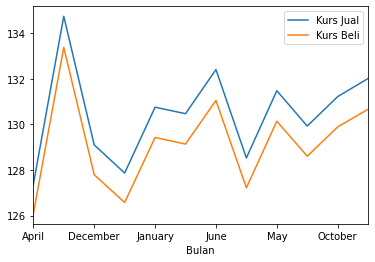

In [264]:
Monthly.plot()

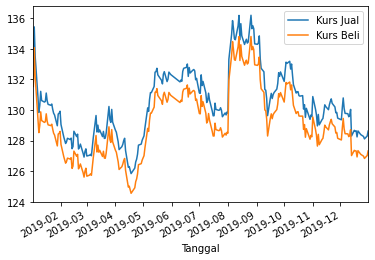

In [267]:
df.plot(kind='line')